### Patrones en minería de datos

# Tarea 1: Beer Clustering

## a) Descarga de Dataset: 
Descargado. 

## b) Descripcion del Dataset:

El Dataset está compuesto de 1.048.576 datos descritos por 13 atributos.

#### **Lista de atributos:**

1. **brewery_id:** Identificador de la compañia. <span style="color:green"> **<** int **>** </span>
2. **brewery_name:** Nombre de la compañia. <span style="color:green"> **<** string **>** </span>
3. **review_time:** Hora cuando fue realizada la reseña. <span style="color:green"> **<** int **>** </span>
4. **review_overall:** Nota general al producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
5. **review_aroma:** Nota al aroma del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
6. **review_appearance:** Nota al cuerpo (apariencia) del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
7. **review_profilename:** Nombre del usuario que realizó la reseña. <span style="color:green"> **<** string **>** </span>
8. **beer_style:** Nombre del estilo de la cerveza. <span style="color:green"> **<** string **>** </span>
9. **review_palate:** Nota de sensación al paladar del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
10. **review_taste:** Nota al sabor del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
11. **beer_name:** Nombre de la cerveza. <span style="color:green"> **<** string **>** </span>
12. **beer_abv:** Porcentaje de alcohol por volumen de la cerveza. <span style="color:green"> **<** int **>** </span> Rango: [0-100]
13. **beer_beerid:** Identificador de la cerveza. <span style="color:green"> **<** int **>** </span>


## c) Prueba de algoritmos:

Para la correcta ejecución del siguiente informe es necesaria la ejecución de las siguientes importaciones de librerias. Puede ver los algoritmos individualmente en sus respectivos archivos en el repositorio. [Ir al repositorio](https://github.com/roloow/Patrones-en-Mineria-de-Datos/tree/master/Tarea%201)

### Librerias y funciones

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador de clusters
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans

### Archivo para generar DataSet

In [15]:
CSV_PATH = 'prueba.csv'

### Gestión del DataSet

Nos encontramos con que la información no es completamente comparable y para poder generar una buena solución utilizaremos solo datos del tipo numéricos. Es por esto que una vez leido y extraida la información del archivo **.csv** filtramos los datos numéricos con excepción a el atributo temporal y los identificadores.

Continuando, el archivo contiene algunos atributos vacios los cuales, al ser numéricos equivales a 0, por lo que hemos decidido utilizar la funcionalidad `.fillna()` que intercambia los valores **NaN** por lo que le demos a la función. (*En este caso, 0*).

Finalmente se procede a normalizar los datos para luego reducir su dimensionalidad mediante las herramientas de **StandardScaler** y **PCA** de **SKLearn** respectivamente.

In [16]:
# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time e identificadores
data = pd.DataFrame({'review_overall':    dataset['review_overall'],
                     'review_aroma':      dataset['review_aroma'],
                     'review_appearance': dataset['review_appearance'],
                     'review_palate':     dataset['review_palate'],
                     'review_taste':      dataset['review_taste'],
                     'beer_abv':          dataset['beer_abv']})

# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)

### 1. K-Means

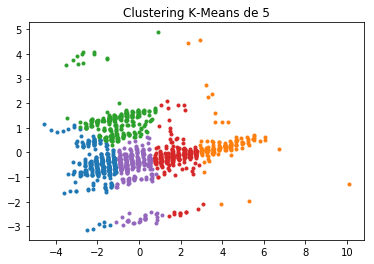

In [17]:
# Parametros
CLUSTERS = 5
MAX_IT = 10

# Inicialización de K-Means
k_means = KMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT)
k_means.fit(data)

# Asignación de labels
labels_kmeans = k_means.labels_


for label in np.unique(labels_kmeans):
    plt.plot(data[labels_kmeans == label, 0], data[labels_kmeans == label, 1], '.')

plt.title('Clustering K-Means de ' + str(CLUSTERS))
plt.show()

### 2. Minibacht k-means

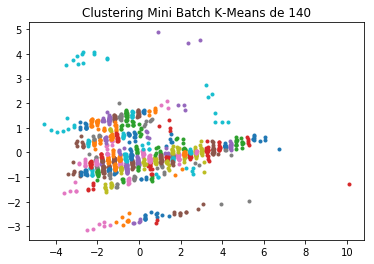

In [18]:
CLUSTERS = 140
MAX_IT = 1000
BATCH_SIZE = 100
MAX_NI = 10

# Inicialización de MiniBatch K-Means
mnk_means = MiniBatchKMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT, batch_size=BATCH_SIZE, max_no_improvement=MAX_NI)
mnk_means.fit(data)

# Asignación de labels
labels_mbkmeans = mnk_means.labels_


for label in np.unique(labels_mbkmeans):
    plt.plot(data[labels_mbkmeans == label, 0], data[labels_mbkmeans == label, 1], '.')

plt.title('Clustering Mini Batch K-Means de ' + str(CLUSTERS))
plt.show()

### 3. HAC Complete 

In [6]:
# Pon tu código acá

### 4. Ward

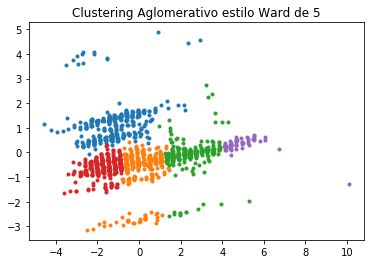

In [19]:
CLUSTERS = 5
MAX_IT = 10

# Asignación de labels
labels_ward = a_ward.labels_


for label in np.unique(labels_ward):
    plt.plot(data[labels_ward == label, 0], data[labels_ward == label, 1], '.')

plt.title('Clustering Aglomerativo estilo Ward de ' + str(CLUSTERS))
plt.show()

### 5. DBScan

In [8]:
# Pon el código aquí

## d) Análisis de etiquetas

Para hacer el análisis de estos patrones utilizaremos las herramientas de **SKLearn** de `metrics`, siendo la que utilizaremos la normalización mutua de información `normalized_mutual_info_score`, la cual abreviaremos como **NMI**.

Para este apartado se pide revisar nombre de la cervecería y tipo de la cerveza para esto utilizaremos sus identificadores que nos permitiran de manera alternativa al string analizar numéricamente la utilidad.

In [24]:
cervecerias = pd.DataFrame({'brewery_id' :dataset['brewery_id']})
cervezas = pd.DataFrame({'beer_beerid' :dataset['beer_beerid']})

cervecerias = cervecerias.values.flatten().tolist()
cervezas = cervezas.values.flatten().tolist()

Una vez tenemos los datos que requerimos, procedemos a generar el índice **NMI** según las etiquetas creadas en los casos anteriores.

        NMI(data, labels)

- K-Means

In [26]:
print "Índice para cervecería:", NMI(cervecerias, labels_kmeans)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_kmeans)

Índice para cervecería: 0.234021222373
Índice para tipo de cervezas: 0.378365220504


- Mini Batch K-Means

In [27]:
print "Índice para cervecería:", NMI(cervecerias, labels_mbkmeans)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_mbkmeans)

Índice para cervecería: 0.404082130824
Índice para tipo de cervezas: 0.578304312466


- Hac Complete

In [28]:
# print "Índice para cervecería:", NMI(cervecerias, labels_hac)
# print "Índice para tipo de cervezas:", NMI(cervezas, labels_hac)

- Ward

In [29]:
print "Índice para cervecería:", NMI(cervecerias, labels_ward)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_ward)

Índice para cervecería: 0.248753143086
Índice para tipo de cervezas: 0.426487551636


- DBScan

In [30]:
#print "Índice para cervecería:", NMI(cervecerias, labels_dbscan)
#print "Índice para tipo de cervezas:", NMI(cervezas, labels_dbscan)

Con estos resultados podemos analizar caso a caso la cercanía en términos relativos de los identificadores individuales pedidos.